> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Dataset Description 

we have a CSV file of the data we need to analysis


### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. 
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(110527, 14)

Data consist of 110527 rows and 14 columbs and that is too much to use excel



In [4]:
# check for dublications
df.duplicated().sum()

0

There is no dublication



In [5]:
# check the numbers of unique values 
df['PatientId'].nunique()

62299

only 62299 out of 110527 are uique values



In [6]:
#check the number of dublicated patients IDs
df['PatientId'].duplicated().sum()

48228

There is 48228 duplicated Id



In [7]:
# check the number of duplicated Ids and noshow
df.duplicated(['PatientId', 'No-show']).sum()

38710

There are 38710 patients have the same status of showing and noshow , we will remove them later



In [8]:
# missing values or any issue 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# getting some information about our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Mean age is 37 and max age is 115 , minimum age is -1 which is mistake but it will not affect our analysis



In [10]:
#identifing the raw index of -1 value of min age
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Data cleaning


In [11]:
# reomving the -1 value for a
df.drop(index=99832, inplace= True)

In [12]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# correction of colomns names
df.rename(columns={'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns={'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# removing duplicated Ids with duplicated showing status 
df.drop_duplicates(['PatientId', 'No_show'], inplace = True)
df.shape

(71816, 14)

In [15]:
# removing un nessesary data
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

we cleaned data and trimmed it , the data s ready to move to exploration stage , creating visualization and computing statistics with the goal of answering the question





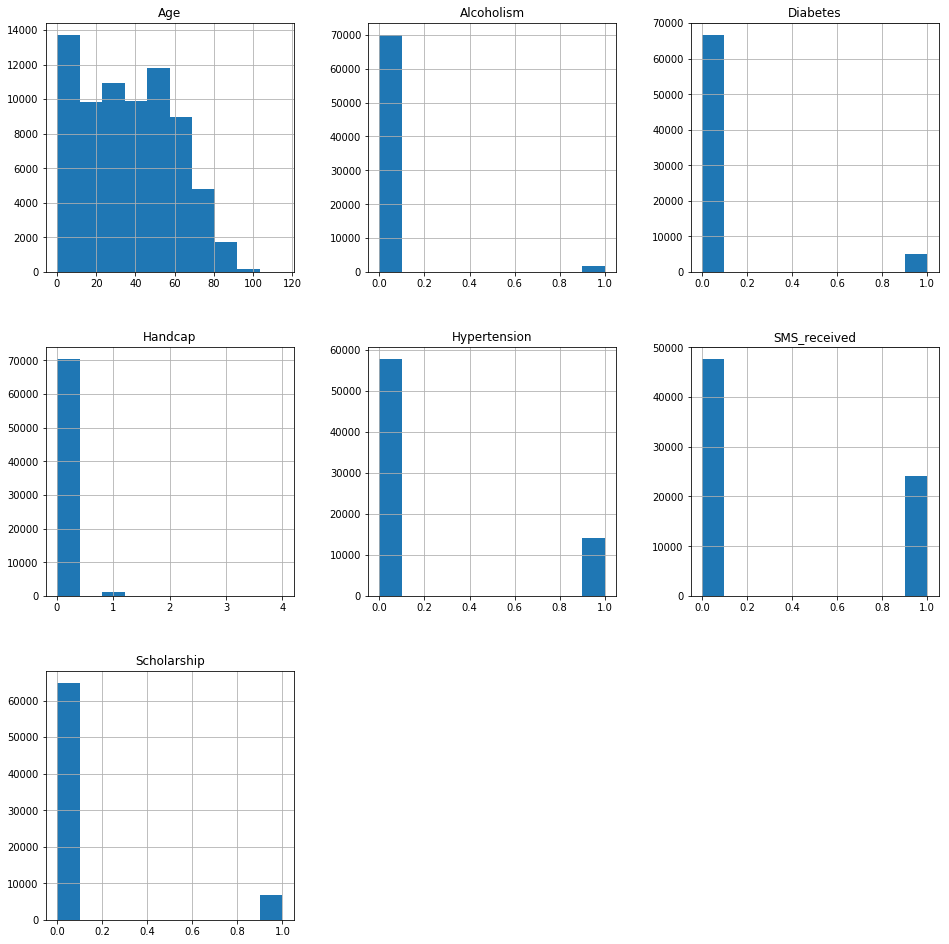

In [16]:
# General look 
# Use this, and more code cells, to explore your data.
df.hist(figsize=(16,16.5));

In [17]:
# we will divid the patinet into 2 groups according to showing and not 
Show = df.No_show == 'No'
noshow = df.No_show == 'Yes'
df[Show].count() ,df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [18]:
df[Show].mean(), df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Mean age of showed patient is 37 , no show patient is 34 recived sms than showed patient that is mean that we need to sevise our sms stratige



### investigation for the infeluence factors on the attendance rate


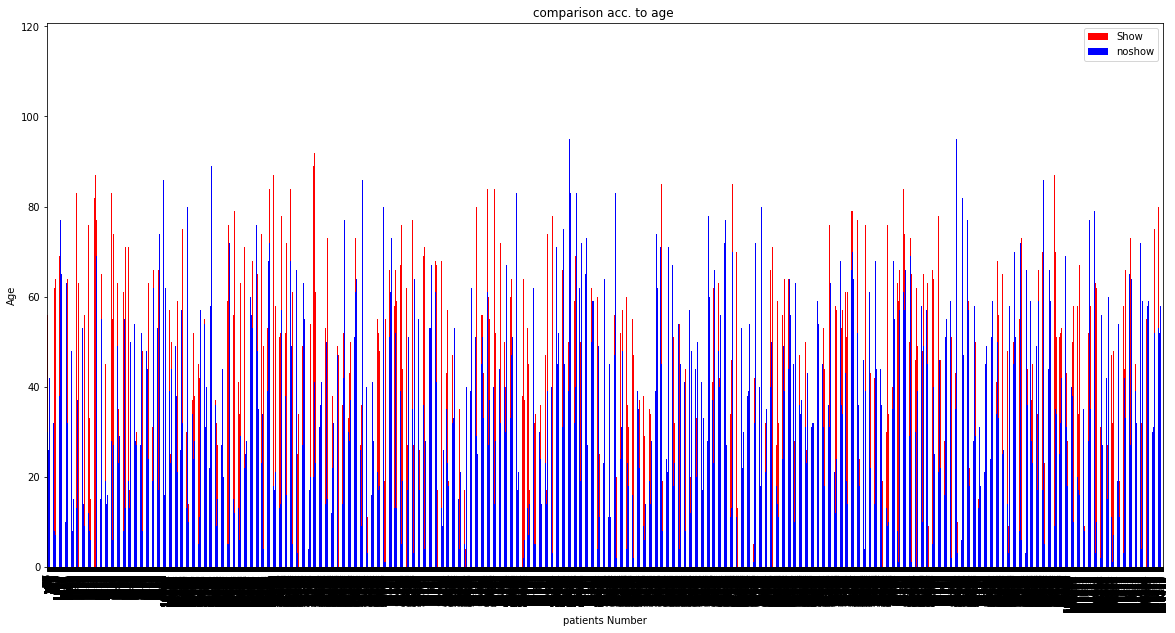

In [21]:
## First question
# Does age related to attendance ?
def Showing_patient(df,col_name,attended,absent):    
    plt.figure(figsize=[20,10])
    df[col_name][Show].plot(kind='bar', color='red', label='Show')
    df[col_name][noshow].plot(kind='bar',color= 'blue',label='noshow')
    plt.legend();
    plt.title('comparison acc. to age ')
    plt.xlabel('patients Number')
    plt.ylabel('Age');
showing_patient(df,'Age',Show,noshow)  

Age from 0-8 are the most to attend and that show how parent take care f there children from 65-100 are the least to attend



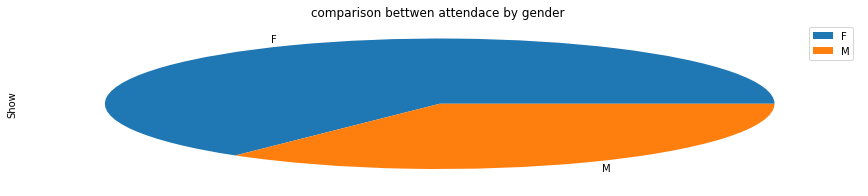

In [23]:
# second question 
# Is there is a relation between gender and attendance?
# what is the percent of sexse attendance ?
def showing_patient (df,col_name,attended,absent):
    plt.figure(figsize=[15,3])
    df[col_name][Show].value_counts(normalize=True).plot(kind='pie', label='Show')
    plt.legend();
    plt.title('comparison bettwen attendace by gender ')

showing_patient (df,'Gender',Show,noshow)

Gender doesnot affect attendance



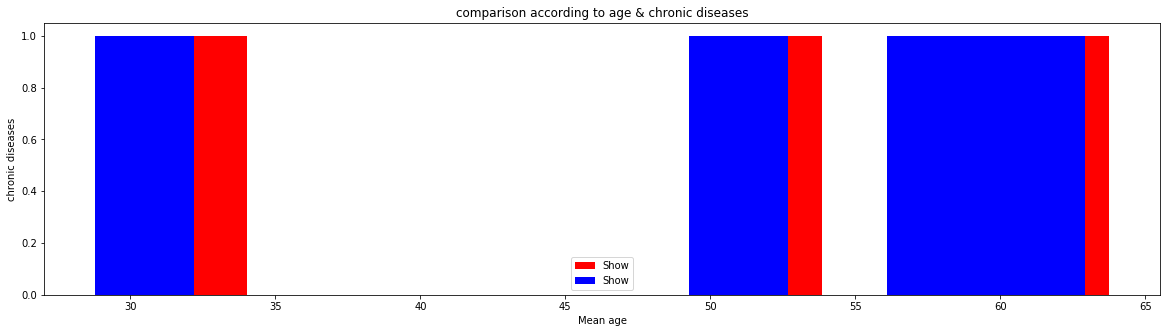

In [24]:
# third question
# Does age and chronic diseases affect the attendance?
plt.figure(figsize=[20,5])
df[Show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='hist',color='red',label='Show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='hist',color='blue',label='Show')
plt.legend();
plt.title('comparison according to age & chronic diseases')
plt.xlabel('Mean age')
plt.ylabel('chronic diseases');

In [25]:
df[Show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']


(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

Mean age of non chronic diseses is 30 and non showing is 28 mean age of hypertensive diabetic showing patients is 64 and non showing is 63 and that mean ther is a relation between age and chronic diseases , and no relation between chronic deseases and attendance

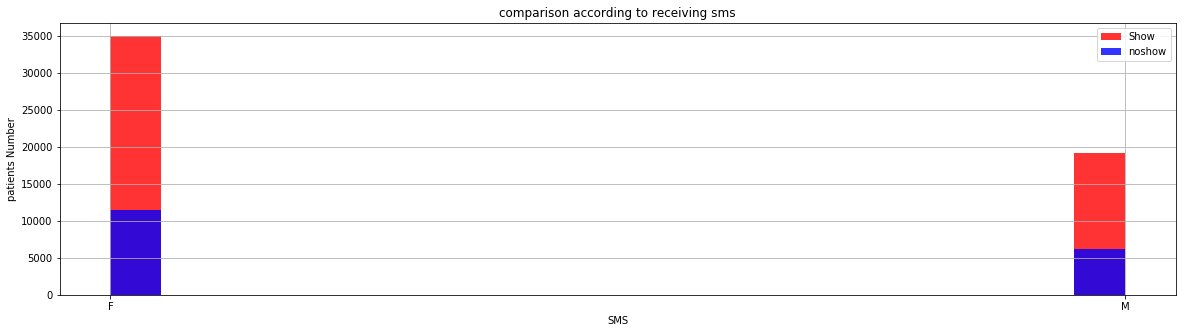

In [44]:
# Fourth question 
# Does receiving sms afect attendance?
def showing_patient (df,col_name,attended,absent):
    plt.figure(figsize=[20,5])
    df[col_name][Show].hist(alpha=0.8, bins=20 ,color='red',label='Show');
    df[col_name][noshow].hist(alpha=0.8, bins=20 ,color='blue',label='noshow');
    plt.legend();
    plt.title('comparison according to receiving sms')
    plt.xlabel('SMS')
    plt.ylabel('patients Number');
showing_patient (df,'Gender',Show,noshow)

Number of showing patients recived SMS is less than number of patients who doesnot recive , we need to look at our SMS campaghin



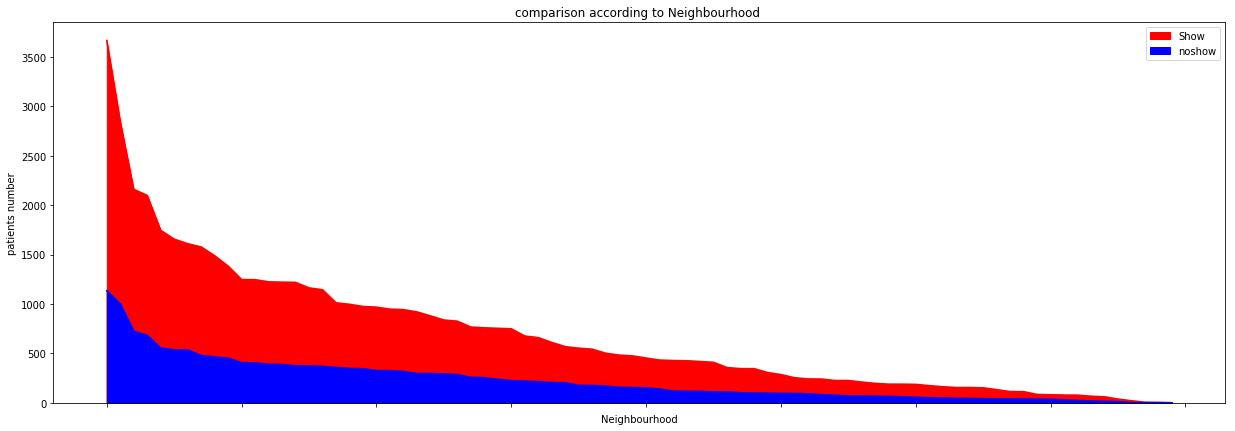

In [27]:
#fifth question 
# Does Neighbourhood affect the attendance ?
plt.figure(figsize=[21,7])
df.Neighbourhood[Show].value_counts().plot(kind='area',color='red',label='Show')
df.Neighbourhood[noshow].value_counts().plot(kind='area',color='blue',label='noshow')
plt.legend();
plt.title('comparison according to Neighbourhood ')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number');

Neighbourhood affects in the attendance



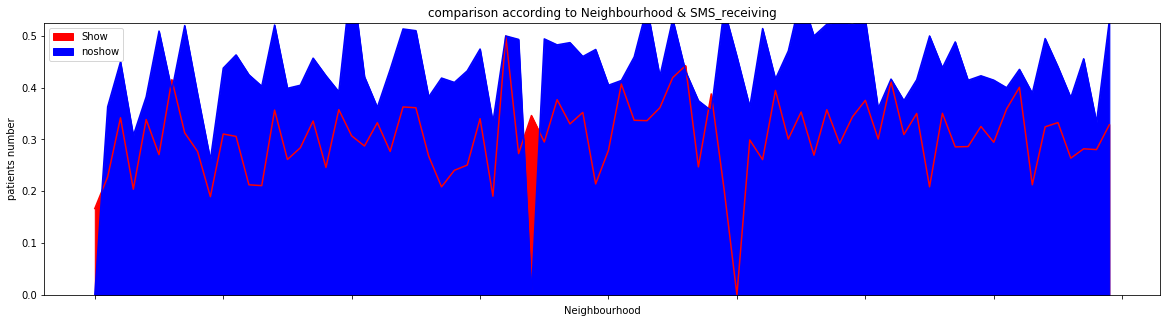

In [28]:
plt.figure(figsize=[20,5])
df[Show].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='area',color='red',label='Show')
df[noshow].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='area',color='blue',label='noshow')
plt.legend()
plt.title('comparison according to Neighbourhood & SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number');

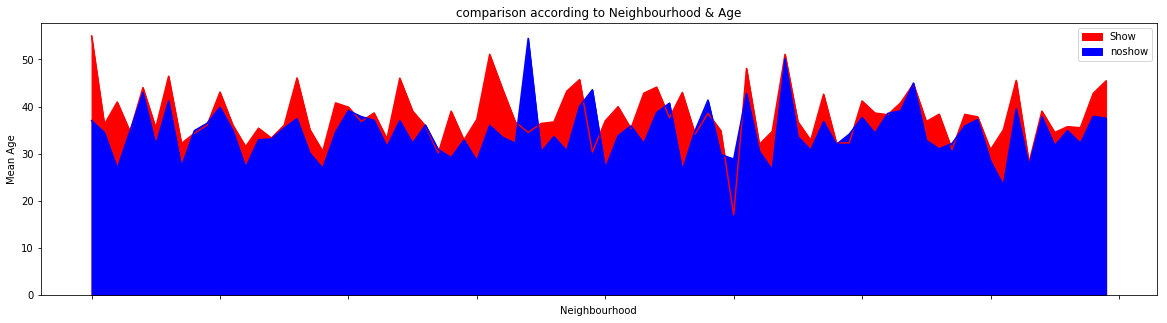

In [29]:
plt.figure(figsize=[20,5])
df[Show].groupby(['Neighbourhood']).Age.mean().plot(kind='area',color='red',label='Show')
df[noshow].groupby(['Neighbourhood']).Age.mean().plot(kind='area',color='blue',label='noshow')
plt.legend()
plt.title('comparison according to Neighbourhood & Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age');

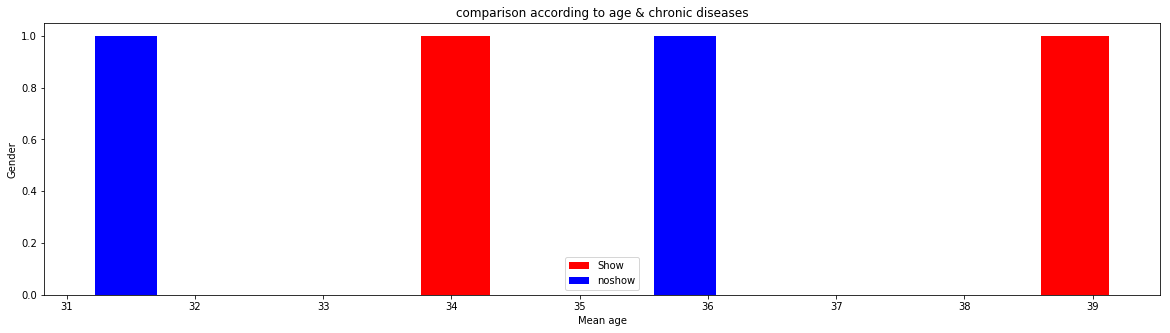

In [30]:
# sixth question
# Does age and chronic gender affect  the attendance together ?
plt.figure(figsize=[20,5])
df[Show].groupby(['Gender']).Age.mean().plot(kind='Hist' , color='red',label='Show')
df[noshow].groupby(['Gender']).Age.mean().plot(kind='Hist',color='blue',label='noshow')
plt.legend();
plt.title('comparison according to age & chronic diseases');
plt.xlabel('Mean age')
plt.ylabel('Gender');

In [31]:
print(df[Show].groupby(['Gender']).Age.mean(),df[noshow].groupby(['Gender']).Age.mean(),
      df[Show].groupby(['Gender']).Age.median(),df[noshow].groupby(['Gender']).Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


There is no relation between age and gender , mean and median are almost the same




<a id='conclusions'></a>
## Conclusions

Number of showing patients who didnot recive SMS is greater than the number who recived sms , that mean when need to look back at our sms compaghin

Nighbourhood affects on the attendance percentage Age affects very well in the attendance rate , from 0-8 are the most patients to show

Number of showing patients from specific neighbourhood affected by reciving sms and ages, there is no relation between chronic deseases and attendance.

Age affect in the attendance rate , age from 0 to 8 attend the most and that reflect that parent takeing care of there child

Neighbourhood affects in the attendance

## Limitations

No clear correlation between: ,showing and gender ,chronic diseases ,enrollment in the welfare program



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0